In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import pandas as pd
import tensorflow as tf
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch.nn.functional as F

In [4]:
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [12]:
batch_size = 64

# Create data loaders.
train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [13]:
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [14]:
n_inputs = 28*28
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [15]:
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [21]:
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            loss, current = loss.item(), (i + 1) * len(images)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(train_loader):>5d}]")
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

loss: 2.159797  [   64/  938]
loss: 2.150767  [ 6464/  938]
loss: 2.168832  [12864/  938]
loss: 2.126252  [19264/  938]
loss: 2.136615  [25664/  938]
loss: 2.145000  [32064/  938]
loss: 2.115661  [38464/  938]
loss: 2.161726  [44864/  938]
loss: 2.130373  [51264/  938]
loss: 2.119182  [57664/  938]
Epoch: 0. Loss: 2.1296865940093994. Accuracy: 72.43
loss: 2.122004  [   64/  938]
loss: 2.109663  [ 6464/  938]
loss: 2.130480  [12864/  938]
loss: 2.086143  [19264/  938]
loss: 2.096681  [25664/  938]
loss: 2.105861  [32064/  938]
loss: 2.078697  [38464/  938]
loss: 2.129073  [44864/  938]
loss: 2.094687  [51264/  938]
loss: 2.085236  [57664/  938]
Epoch: 1. Loss: 2.0954277515411377. Accuracy: 74.51
loss: 2.088781  [   64/  938]
loss: 2.073668  [ 6464/  938]
loss: 2.096609  [12864/  938]
loss: 2.051816  [19264/  938]
loss: 2.061618  [25664/  938]
loss: 2.071532  [32064/  938]
loss: 2.046452  [38464/  938]
loss: 2.099872  [44864/  938]
loss: 2.063421  [51264/  938]
loss: 2.055812  [57664/  9

loss: 1.797906  [25664/  938]
loss: 1.811271  [32064/  938]
loss: 1.795177  [38464/  938]
loss: 1.855805  [44864/  938]
loss: 1.822063  [51264/  938]
loss: 1.822565  [57664/  938]
Epoch: 23. Loss: 1.7984217405319214. Accuracy: 83.73
loss: 1.820046  [   64/  938]
loss: 1.796197  [ 6464/  938]
loss: 1.819979  [12864/  938]
loss: 1.803281  [19264/  938]
loss: 1.793444  [25664/  938]
loss: 1.806724  [32064/  938]
loss: 1.790585  [38464/  938]
loss: 1.851072  [44864/  938]
loss: 1.817665  [51264/  938]
loss: 1.818169  [57664/  938]
Epoch: 24. Loss: 1.7931067943572998. Accuracy: 83.76
loss: 1.815446  [   64/  938]
loss: 1.791771  [ 6464/  938]
loss: 1.815225  [12864/  938]
loss: 1.799440  [19264/  938]
loss: 1.789227  [25664/  938]
loss: 1.802425  [32064/  938]
loss: 1.786232  [38464/  938]
loss: 1.846577  [44864/  938]
loss: 1.813493  [51264/  938]
loss: 1.813996  [57664/  938]
Epoch: 25. Loss: 1.7880548238754272. Accuracy: 83.88
loss: 1.811072  [   64/  938]
loss: 1.787577  [ 6464/  938]
l

loss: 1.785391  [44864/  938]
loss: 1.757230  [51264/  938]
loss: 1.757255  [57664/  938]
Epoch: 46. Loss: 1.7189722061157227. Accuracy: 85.07
loss: 1.750777  [   64/  938]
loss: 1.731314  [ 6464/  938]
loss: 1.749590  [12864/  938]
loss: 1.747153  [19264/  938]
loss: 1.731757  [25664/  938]
loss: 1.744228  [32064/  938]
loss: 1.725864  [38464/  938]
loss: 1.783450  [44864/  938]
loss: 1.755460  [51264/  938]
loss: 1.755452  [57664/  938]
Epoch: 47. Loss: 1.7167761325836182. Accuracy: 85.11
loss: 1.748830  [   64/  938]
loss: 1.729549  [ 6464/  938]
loss: 1.747664  [12864/  938]
loss: 1.745634  [19264/  938]
loss: 1.730078  [25664/  938]
loss: 1.742560  [32064/  938]
loss: 1.724084  [38464/  938]
loss: 1.781566  [44864/  938]
loss: 1.753742  [51264/  938]
loss: 1.753701  [57664/  938]
Epoch: 48. Loss: 1.7146430015563965. Accuracy: 85.16
loss: 1.746936  [   64/  938]
loss: 1.727835  [ 6464/  938]
loss: 1.745795  [12864/  938]
loss: 1.744159  [19264/  938]
loss: 1.728448  [25664/  938]
l

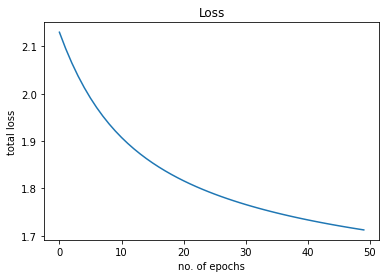

In [22]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

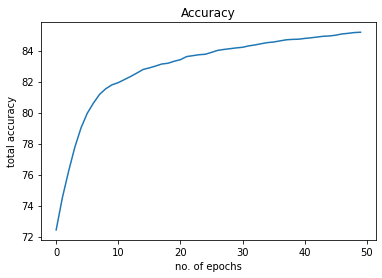

In [23]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()